## Veri Setine Genel Bakış

In [4]:
import pandas as pd
from pandas import DataFrame

In [5]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
n_rows, n_columns = df.shape
print(f"Sütun Sayısı: {n_columns} \nSatır Sayısı: {n_rows}")

Sütun Sayısı: 21 
Satır Sayısı: 7043


In [6]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
# TotalCharges bir object olarak görünüyor oysaki float olmalı
total_charge = df["TotalCharges"]
missing = total_charge[~total_charge.str.replace(".", "").str.isdigit()]
print("Hatalı Gözlem Sayısı: ", len(missing))

Hatalı Gözlem Sayısı:  11


In [8]:
missing.head(11)

488      
753      
936      
1082     
1340     
3331     
3826     
4380     
5218     
6670     
6754     
Name: TotalCharges, dtype: object

In [9]:
df["TotalCharges"] = df["TotalCharges"].apply(pd.to_numeric, errors="coerce")

In [10]:
df = df.dropna(subset=['TotalCharges'])

In [11]:
n_rows, n_columns = df.shape
print(f"Sütun Sayısı: {n_columns} \nSatır Sayısı: {n_rows}")

Sütun Sayısı: 21 
Satır Sayısı: 7032


In [12]:
df.to_csv('Telco-Customer-Churn.csv', index=False)

## Konfigürasyon ve Spark Bağlantısı

ilkel bağlantı yöntemi

In [10]:
import pyspark
from pyspark import SparkContext

ModuleNotFoundError: No module named 'pyspark'

In [15]:
sc = SparkContext(master = "local")
sc

<SparkContext master=local appName=pyspark-shell>

In [17]:
sc.sparkUser()

'cuneyd'

In [13]:
dir(sc)

['PACKAGE_EXTENSIONS',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getnewargs__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_accumulatorServer',
 '_active_spark_context',
 '_assert_on_driver',
 '_batchSize',
 '_callsite',
 '_checkpointFile',
 '_conf',
 '_dictToJavaMap',
 '_do_init',
 '_encryption_enabled',
 '_ensure_initialized',
 '_gateway',
 '_getJavaStorageLevel',
 '_initialize_context',
 '_javaAccumulator',
 '_jsc',
 '_jvm',
 '_lock',
 '_next_accum_id',
 '_pickled_broadcast_vars',
 '_python_includes',
 '_repr_html_',
 '_serialize_to_jvm',
 '_temp_dir',
 '_unbatched_serializer',
 'accumulator',
 'addArchive',
 'addFile',
 'addJobTag',


In [21]:
sc.stop()

In [13]:
!pip install findspark

In [14]:
import findspark

In [15]:
findspark.init("/Users/cuneyd/spark/spark-3.5.0-bin-hadoop3")

In [16]:
import warnings
warnings.filterwarnings("ignore")

## Spark Session ve Veri Seti
-- Gelişmiş bağlantı yöntemi ve ayarlar

In [17]:
import pyspark

from pyspark.sql import SparkSession
from pyspark.conf import SparkConf
from pyspark import SparkContext

In [18]:
spark = SparkSession.builder \
    .master("local") \
    .appName("Telco-Customer-Churn") \
    .config("spark.executer.memory","4gb") \
    .getOrCreate()

sc = spark.sparkContext
sc

23/12/25 12:16:06 WARN Utils: Your hostname, CK-MacBook.local resolves to a loopback address: 127.0.0.1, but we couldn't find any external IP address!
23/12/25 12:16:06 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/12/25 12:16:07 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


<SparkContext master=local appName=Telco-Customer-Churn>

23/12/25 12:16:19 WARN GarbageCollectionMetrics: To enable non-built-in garbage collector(s) List(G1 Concurrent GC), users should configure it(them) to spark.eventLog.gcMetrics.youngGenerationGarbageCollectors or spark.eventLog.gcMetrics.oldGenerationGarbageCollectors


In [7]:
sc.stop()

## Veri Setinin Local'den Spark'a Taşınması ve Cache'leme

In [46]:
spark_df = spark.read.csv("Telco-Customer-Churn.csv", header=True, inferSchema=True, sep =",")
spark_df.cache()

23/12/25 12:54:22 WARN CacheManager: Asked to cache already cached data.


DataFrame[customerID: string, gender: string, SeniorCitizen: int, Partner: string, Dependents: string, tenure: int, PhoneService: string, MultipleLines: string, InternetService: string, OnlineSecurity: string, OnlineBackup: string, DeviceProtection: string, TechSupport: string, StreamingTV: string, StreamingMovies: string, Contract: string, PaperlessBilling: string, PaymentMethod: string, MonthlyCharges: double, TotalCharges: double, Churn: string]

In [47]:
spark_df.printSchema()

root
 |-- customerID: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- SeniorCitizen: integer (nullable = true)
 |-- Partner: string (nullable = true)
 |-- Dependents: string (nullable = true)
 |-- tenure: integer (nullable = true)
 |-- PhoneService: string (nullable = true)
 |-- MultipleLines: string (nullable = true)
 |-- InternetService: string (nullable = true)
 |-- OnlineSecurity: string (nullable = true)
 |-- OnlineBackup: string (nullable = true)
 |-- DeviceProtection: string (nullable = true)
 |-- TechSupport: string (nullable = true)
 |-- StreamingTV: string (nullable = true)
 |-- StreamingMovies: string (nullable = true)
 |-- Contract: string (nullable = true)
 |-- PaperlessBilling: string (nullable = true)
 |-- PaymentMethod: string (nullable = true)
 |-- MonthlyCharges: double (nullable = true)
 |-- TotalCharges: double (nullable = true)
 |-- Churn: string (nullable = true)



-- kolon isimleri üzerinde düzenleme

In [48]:
spark_df = spark_df.withColumnRenamed("customerID","CustomerID")
spark_df = spark_df.withColumnRenamed("gender","Gender")
spark_df = spark_df.withColumnRenamed("tenure","Tenure")
spark_df.printSchema()

root
 |-- CustomerID: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- SeniorCitizen: integer (nullable = true)
 |-- Partner: string (nullable = true)
 |-- Dependents: string (nullable = true)
 |-- Tenure: integer (nullable = true)
 |-- PhoneService: string (nullable = true)
 |-- MultipleLines: string (nullable = true)
 |-- InternetService: string (nullable = true)
 |-- OnlineSecurity: string (nullable = true)
 |-- OnlineBackup: string (nullable = true)
 |-- DeviceProtection: string (nullable = true)
 |-- TechSupport: string (nullable = true)
 |-- StreamingTV: string (nullable = true)
 |-- StreamingMovies: string (nullable = true)
 |-- Contract: string (nullable = true)
 |-- PaperlessBilling: string (nullable = true)
 |-- PaymentMethod: string (nullable = true)
 |-- MonthlyCharges: double (nullable = true)
 |-- TotalCharges: double (nullable = true)
 |-- Churn: string (nullable = true)



In [49]:
spark_df.distinct().count()

7032

In [50]:
spark_df.groupby("CustomerID").count().sort("count", ascending = False).show(3)

+----------+-----+
|CustomerID|count|
+----------+-----+
|3668-QPYBK|    1|
|6234-RAAPL|    1|
|1894-IGFSG|    1|
+----------+-----+
only showing top 3 rows



In [23]:
spark_df.filter(spark_df.CustomerID == "1894-IGFSG").show()

AttributeError: 'DataFrame' object has no attribute 'CustomerID'

-- İsme göre çoklama kayıtları sil
spark_df.select("names").dropDuplicates().groupBy("names").count().sort("count", ascending = False).show(3)

-- Veriyi bir girdi olarak kullanmak üzere string olarak çekme

## Keşifçi Veri Analizi

In [51]:
spark_df.select("Gender","Tenure", "MonthlyCharges","TotalCharges","Churn").describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
Gender,7032,None,None,Female,Male
Tenure,7032,32.421786120591584,24.545259709263245,1,72
MonthlyCharges,7032,64.79820819112632,30.085973884049825,18.25,118.75
TotalCharges,7032,2283.3004408418697,2266.771361883145,18.8,8684.8
Churn,7032,None,None,No,Yes


In [29]:
spark_df.filter(spark_df.MonthlyCharges > 95).count()

1295

In [37]:
spark_df.groupBy("Churn").count().show()

+-----+-----+
|Churn|count|
+-----+-----+
|   No| 5163|
|  Yes| 1869|
+-----+-----+



-- Basit Çaprazlama ile Toplam Satınalma Ortalaması ve Churn olma durumu arasında ayırt edicilik var mı?

In [38]:
spark_df.groupBy("Churn").agg({"TotalCharges": "mean" }).show()

+-----+------------------+
|Churn| avg(TotalCharges)|
+-----+------------------+
|   No|2555.3441410032997|
|  Yes|1531.7960941680035|
+-----+------------------+



## Korelasyon Oluşturma ve Veri Görselleştirmesi

In [52]:
kor_data = spark_df.drop("CustomerID","Partner","Dependents","PhoneService","MultipleLines","OnlineSecurity", \
                         "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", \
                         "PaperlessBilling").toPandas()

In [53]:
import seaborn as sb

In [54]:
sb.distplot(kor_data.CustomerID);

AttributeError: 'DataFrame' object has no attribute 'CustomerID'

ValueError: Could not interpret value `GenderBin` for parameter `x`

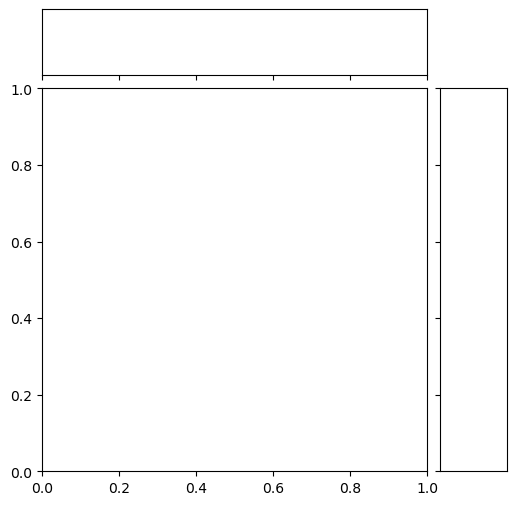

In [36]:
sb.jointplot(x = 'GenderBin', y = 'MonthlyCharges', data = kor_data)
# Ortak dağılım grafiği, saçılım grafiği ile histogramı birleştirerek bize iki değişkenli dağılımlar hakkında detaylı bilgi verir.

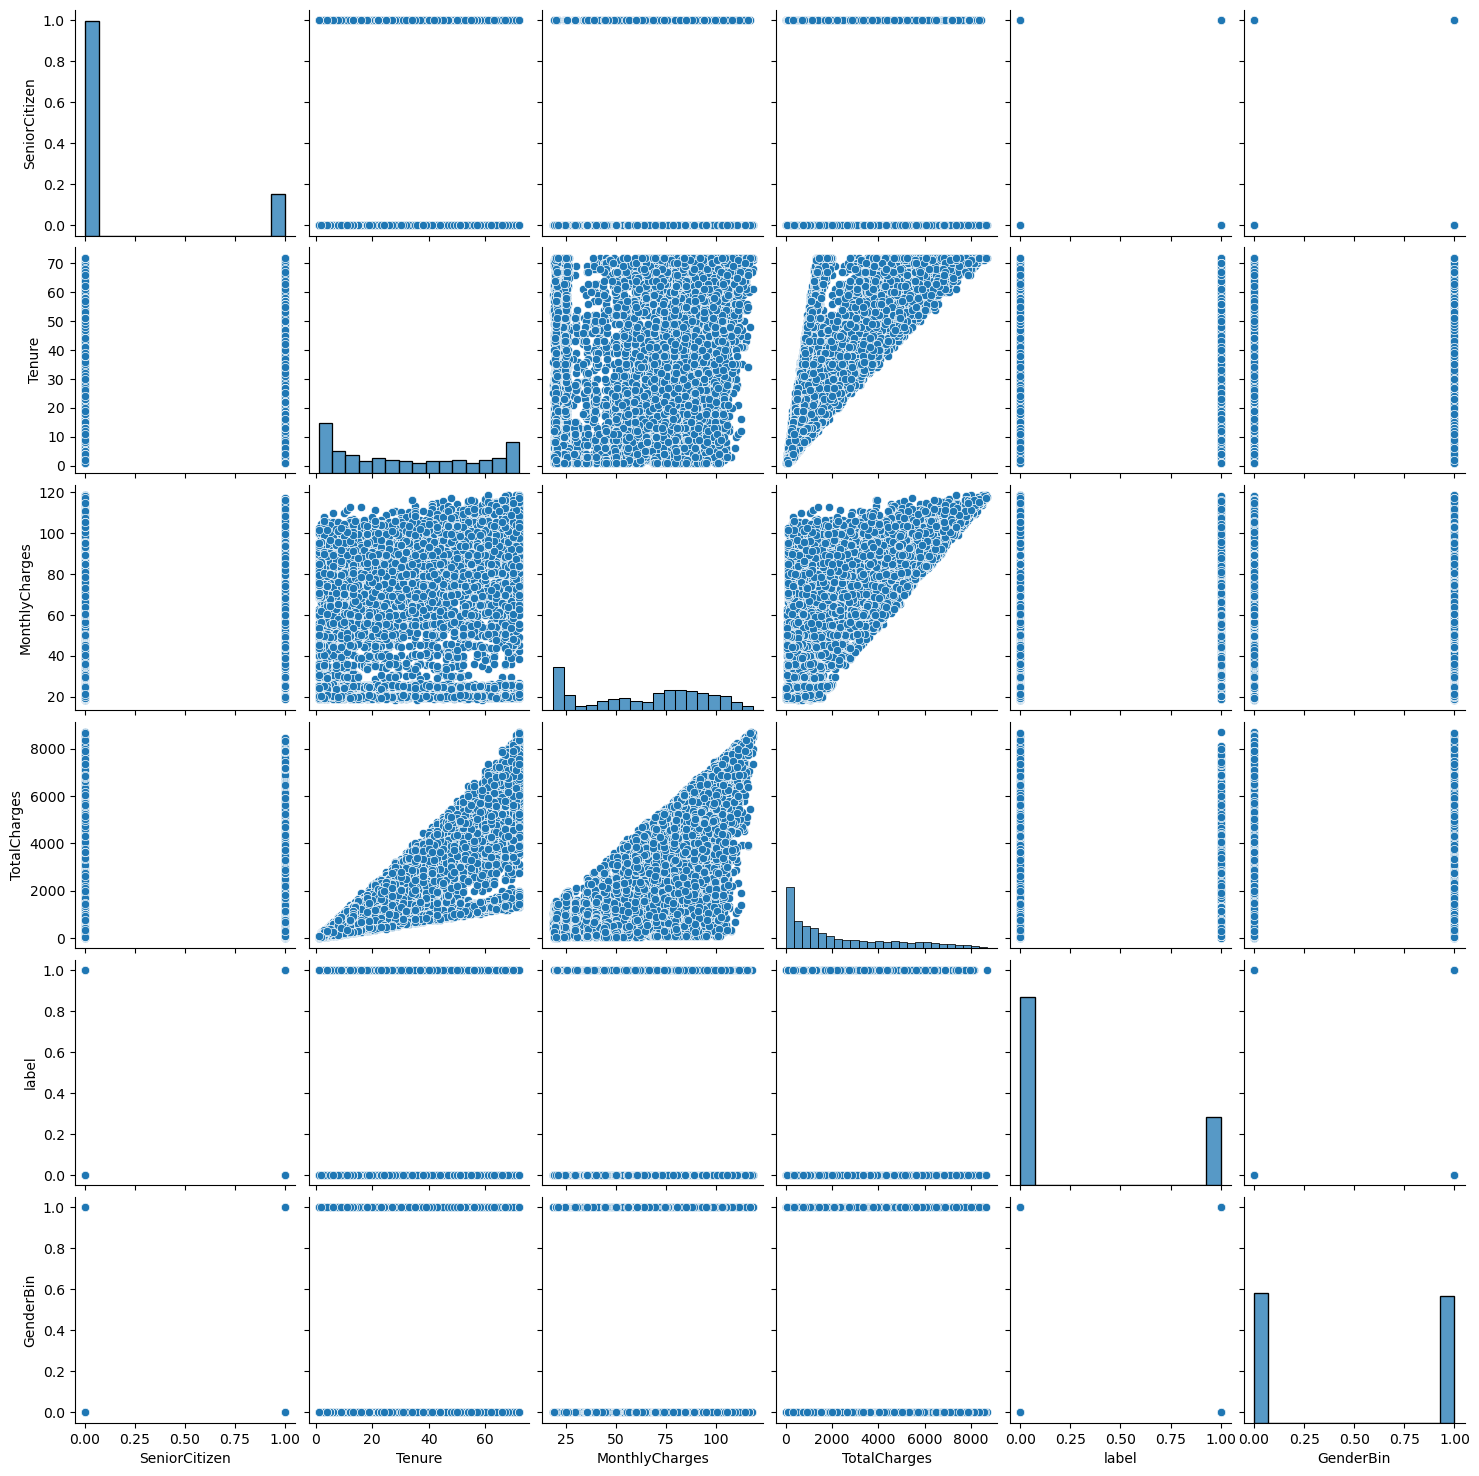

In [82]:
sb.pairplot(kor_data)
# Çapraz grafik.. Veri setindeki birden çok çift yönlü iki değişkenli dağılımı çizmek için

In [1]:
# Özelleştirilmiş renk paleti
#custom_palette = ["#FF0000", "#000000"]

sb.pairplot(kor_data, vars = ["GenderBin", "MonthlyCharges", "TotalCharges"], kind = "reg" , hue = "Churn")
# bağımsız değişkenlerin birbirleri arasındaki korelasyona bakarak, churn bir katman olarak ekleyince
# churn = 1 iken yaş ile satınalma arasında pozitif bir korelasyon var iken,
# churn = 0 iken negatif bir korelasyon var
# bağımsız değişkenlerin birbirlerini etkileme düzeylerine churn etkisi ya da değişkenlerin çarpıştırıldığında bağımlı değişkene olan etkisini gözlemleme

NameError: name 'sb' is not defined

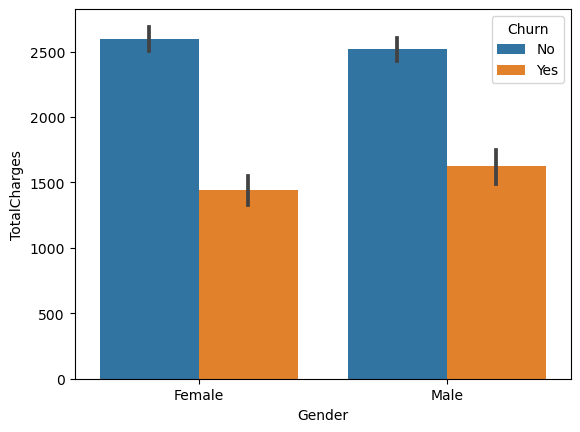

In [120]:
sb.barplot( x= "Gender", y = "TotalCharges", hue="Churn", data=kor_data);

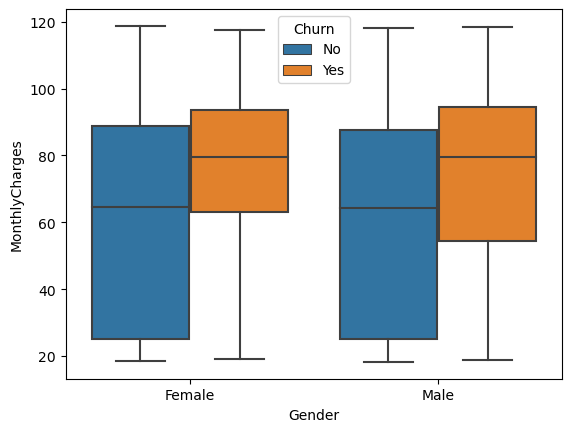

In [119]:
sb.boxplot(x="Gender",y="MonthlyCharges",hue="Churn",data=kor_data);

In [132]:
kor_dataX = spark_df.drop("CustomerID","Gender","SeniorCitizen","Partner","Dependents","Tenure","PhoneService","MultipleLines","OnlineSecurity", \
                         "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies","Contract", \
                         "PaperlessBilling","PaymentMethod","MonthlyCharges","TotalCharges","Churn","GenderBin","label").toPandas()


## Veri Ön İşleme
-- Feature engineering

In [27]:
spark_df = spark_df.dropna()
# eksik gözlemleri uçur

In [28]:
spark_df.distinct().count()

7032

In [29]:
# BAĞIMLI DEĞİŞKEN İŞLEME

In [25]:
from pyspark.ml.feature import StringIndexer
strIndexer = StringIndexer(inputCol = "Churn", outputCol="label")

In [26]:
?StringIndexer

Init signature:
StringIndexer(
    *,
    inputCol: Optional[str] = None,
    outputCol: Optional[str] = None,
    inputCols: Optional[List[str]] = None,
    outputCols: Optional[List[str]] = None,
    handleInvalid: str = 'error',
    stringOrderType: str = 'frequencyDesc',
)
Docstring:     
A label indexer that maps a string column of labels to an ML column of label indices.
If the input column is numeric, we cast it to string and index the string values.
The indices are in [0, numLabels). By default, this is ordered by label frequencies
so the most frequent label gets index 0. The ordering behavior is controlled by
setting :py:attr:`stringOrderType`. Its default value is 'frequencyDesc'.

.. versionadded:: 1.4.0

Examples
--------
>>> stringIndexer = StringIndexer(inputCol="label", outputCol="indexed",
...     stringOrderType="frequencyDesc")
>>> stringIndexer.setHandleInvalid("error")
StringIndexer...
>>> model = stringIndexer.fit(stringIndDf)
>>> model.setHandleInvalid("error")
St

In [26]:
indexed = strIndexer.fit(spark_df).transform(spark_df)

In [27]:
indexed.dtypes

[('CustomerID', 'string'),
 ('Gender', 'string'),
 ('SeniorCitizen', 'int'),
 ('Partner', 'string'),
 ('Dependents', 'string'),
 ('Tenure', 'int'),
 ('PhoneService', 'string'),
 ('MultipleLines', 'string'),
 ('InternetService', 'string'),
 ('OnlineSecurity', 'string'),
 ('OnlineBackup', 'string'),
 ('DeviceProtection', 'string'),
 ('TechSupport', 'string'),
 ('StreamingTV', 'string'),
 ('StreamingMovies', 'string'),
 ('Contract', 'string'),
 ('PaperlessBilling', 'string'),
 ('PaymentMethod', 'string'),
 ('MonthlyCharges', 'double'),
 ('TotalCharges', 'double'),
 ('Churn', 'string'),
 ('label', 'double')]

In [31]:
# BAĞIMSIZ DEĞİŞKENLERİ İŞLEME

In [48]:
#genderIndexer = StringIndexer(inputCol = "Gender", outputCol = "GenderIndex")

In [49]:
#genderIndexed = genderIndexer.fit(spark_df).transform(spark_df)

In [28]:
from pyspark.sql.functions import when
spark_df = indexed.withColumn("GenderBin", when(spark_df["Gender"] == "Female", 1).otherwise(0))

In [29]:
spark_df.dtypes

[('CustomerID', 'string'),
 ('Gender', 'string'),
 ('SeniorCitizen', 'int'),
 ('Partner', 'string'),
 ('Dependents', 'string'),
 ('Tenure', 'int'),
 ('PhoneService', 'string'),
 ('MultipleLines', 'string'),
 ('InternetService', 'string'),
 ('OnlineSecurity', 'string'),
 ('OnlineBackup', 'string'),
 ('DeviceProtection', 'string'),
 ('TechSupport', 'string'),
 ('StreamingTV', 'string'),
 ('StreamingMovies', 'string'),
 ('Contract', 'string'),
 ('PaperlessBilling', 'string'),
 ('PaymentMethod', 'string'),
 ('MonthlyCharges', 'double'),
 ('TotalCharges', 'double'),
 ('Churn', 'string'),
 ('label', 'double'),
 ('GenderBin', 'int')]

In [30]:
spark_df.select("CustomerID", "Gender", "GenderBin", "label").show(3)

+----------+------+---------+-----+
|CustomerID|Gender|GenderBin|label|
+----------+------+---------+-----+
|7590-VHVEG|Female|        1|  0.0|
|5575-GNVDE|  Male|        0|  0.0|
|3668-QPYBK|  Male|        0|  1.0|
+----------+------+---------+-----+
only showing top 3 rows



In [31]:
bagimsiz = ["GenderBin", "SeniorCitizen", "Tenure", "MonthlyCharges", "TotalCharges"]

In [32]:
from pyspark.ml.feature import VectorAssembler
va = VectorAssembler(inputCols = bagimsiz, outputCol="features")

In [33]:
va_df = va.transform(spark_df).select(["features" , "label"])

In [34]:
va_df.show()

+--------------------+-----+
|            features|label|
+--------------------+-----+
|[1.0,0.0,1.0,29.8...|  0.0|
|[0.0,0.0,34.0,56....|  0.0|
|[0.0,0.0,2.0,53.8...|  1.0|
|[0.0,0.0,45.0,42....|  0.0|
|[1.0,0.0,2.0,70.7...|  1.0|
|[1.0,0.0,8.0,99.6...|  1.0|
|[0.0,0.0,22.0,89....|  0.0|
|[1.0,0.0,10.0,29....|  0.0|
|[1.0,0.0,28.0,104...|  1.0|
|[0.0,0.0,62.0,56....|  0.0|
|[0.0,0.0,13.0,49....|  0.0|
|[0.0,0.0,16.0,18....|  0.0|
|[0.0,0.0,58.0,100...|  0.0|
|[0.0,0.0,49.0,103...|  1.0|
|[0.0,0.0,25.0,105...|  0.0|
|[1.0,0.0,69.0,113...|  0.0|
|[1.0,0.0,52.0,20....|  0.0|
|[0.0,0.0,71.0,106...|  0.0|
|[1.0,0.0,10.0,55....|  1.0|
|[1.0,0.0,21.0,90....|  0.0|
+--------------------+-----+
only showing top 20 rows



## Test - Train Ayırma

In [49]:
split = va_df.randomSplit([0.8, 0.2], seed=234)

In [50]:
train_df = split[0]
train_df

DataFrame[features: vector, label: double]

In [51]:
test_df = split[1]
test_df

DataFrame[features: vector, label: double]

## GBM ile Customer Churn Modellemesi

In [52]:
from pyspark.ml.classification import GBTClassifier

In [53]:
gbm = GBTClassifier(maxIter=10, featuresCol = "features", labelCol = "label")

In [54]:
gbm_model = gbm.fit(train_df)

In [55]:
pred_ilkel = gbm_model.transform(test_df)
pred_ilkel

DataFrame[features: vector, label: double, rawPrediction: vector, probability: vector, prediction: double]

In [56]:
acr = pred_ilkel.select("label", "prediction")

In [57]:
acr.filter(acr.label == acr.prediction).count()/acr.count()

0.7847929395790902

## Cross Validation

In [58]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

eva = BinaryClassificationEvaluator() #Binary Classification Değerlendirme Yöntemi

paramGrid = (ParamGridBuilder()
             .addGrid(gbm.maxDepth, [2, 4, 6])
             .addGrid(gbm.maxBins, [20, 30])
             .addGrid(gbm.maxIter, [10, 20])
             .build())
                    #model nesnesi,             parametre uzayı,                     #kaç katlı olacağı
cr_val = CrossValidator(estimator= gbm, estimatorParamMaps = paramGrid, evaluator=eva, numFolds= 10)

In [59]:
val_model = cr_val.fit(train_df)

In [60]:
pred_val = val_model.transform(test_df)

In [61]:
acr_val = pred_val.select("label", "prediction")

In [62]:
acr_val.filter(acr_val.label == acr_val.prediction).count() / acr_val.count()

0.791581805838425

## Yeni Müşteri Hakkında

In [63]:
import pandas as pd
CustomerID = pd.Series(["CUNEYD-7", "ELIF-41"])
Gender = pd.Series(["Male", "Female"])
SeniorCitizen = pd.Series([0, 0])
Partner = pd.Series(["No","No"])
Dependents = pd.Series(["Yes","Yes"])
Tenure = pd.Series([10,2])
PhoneService = pd.Series(["Yes","Yes"])
MultipleLines = pd.Series(["Yes","No"])
InternetService = pd.Series(["Yes","Yes"])
OnlineSecurity = pd.Series(["Yes","No"])
OnlineBackup = pd.Series(["No","Yes"])
DeviceProtection = pd.Series(["Yes","Yes"])
TechSupport = pd.Series(["Yes","No"])
StreamingTV = pd.Series(["No","Yes"])
StreamingMovies = pd.Series(["Yes","No"])
Contract = pd.Series(["Month-to-month","Two year"])
PaperlessBilling = pd.Series(["Yes","Yes"])
PaymentMethod = pd.Series(["Credit card (automatic)","Electronic check"])
MonthlyCharges = pd.Series([120.20,17.90])
TotalCharges = pd.Series([1202.00,35.80])
GenderBin = pd.Series([0, 1])

yeni_musteriler = pd.DataFrame({
    'CustomerID':CustomerID,
    'Gender': Gender,
    'SeniorCitizen': SeniorCitizen,
    'Partner': Partner,
    'Dependents': Dependents,
    'Tenure': Tenure,
    'PhoneService': PhoneService,
    'MultipleLines': MultipleLines,
    'InternetService': InternetService,
    'OnlineSecurity': OnlineSecurity,
    'OnlineBackup': OnlineBackup,
    'DeviceProtection': DeviceProtection,
    'TechSupport':TechSupport,
    'StreamingTV': StreamingTV,
    'StreamingMovies': StreamingMovies,
    'Contract': Contract,
    'PaperlessBilling': PaperlessBilling,
    'PaymentMethod': PaymentMethod,
    'MonthlyCharges': MonthlyCharges,
    'TotalCharges': TotalCharges,
    'GenderBin': GenderBin})

In [64]:
yeni_musteriler

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,GenderBin
0,CUNEYD-7,Male,0,No,Yes,10,Yes,Yes,Yes,Yes,...,Yes,Yes,No,Yes,Month-to-month,Yes,Credit card (automatic),120.2,1202.0,0
1,ELIF-41,Female,0,No,Yes,2,Yes,No,Yes,No,...,Yes,No,Yes,No,Two year,Yes,Electronic check,17.9,35.8,1


In [65]:
yeni_spark_df = spark.createDataFrame(yeni_musteriler) #Pandas'tan (local) Spark'a taşı

In [27]:
yeni_spark_df.select("CustomerID","Gender").show()

NameError: name 'yeni_spark_df' is not defined

In [77]:
#Müşterileri modelde çalıştırmak için vektör formuna çevirme

In [70]:
yeni_musteriler = va.transform(yeni_spark_df)

In [71]:
yeni_musteri_churn = val_model.transform(yeni_musteriler)

In [72]:
yeni_musteri_churn.select("CustomerID","prediction").show()

+----------+----------+
|CustomerID|prediction|
+----------+----------+
|  CUNEYD-7|       1.0|
|   ELIF-41|       0.0|
+----------+----------+



## Decision Tree denemesi

In [77]:
from pyspark.ml.classification import DecisionTreeClassifier
dt = DecisionTreeClassifier(featuresCol = 'features', labelCol = 'label', maxDepth = 3)
dt_model = dt.fit(train_df)
y_pred = dt_model.transform(test_df)
ac = y_pred.select("label", "prediction")
ac.filter(ac.label == ac.prediction).count() / ac.count()

0.7861507128309573

In [136]:
sc.stop()